Geospatial data classification using Principal component analysis

Dataset='sst.mon.mean.nc'

The dataset contains monthly global sea surface temperature data. There is a region over pacific ocean called Nino 3.4 (longitude=[170:290] ,latitude= [84:96]). If the average sst ANOMALY(True value- long term mean) value for the region for a month is greater than .5 then it is called 'El-nino' if less than -.5 then 'La-nina'. 

You need to perform classification task using PCA and NN classifier to classify the input data into 'El-nino' and 'La-nina'.

The steps to be performed are:
1)Dataset preparation and visualization

1.a)Load dataset using NetCDF4
1.b)Separate lon,lat,sst and time in different variables
1.c)Plot data on Basemap taking the mean Nino 3.4 region ([170:290] for longitude and [84:96] for latitude) over the years
1.d)Prepare sst anomaly (sst value - mean sst value) for the whole dataset as model input
1.e)Calculate sst anomaly for the nino 3.4 region
1.f)Calculate mean nino 3.4 sst anomaly for each year
1.g)Detrend mean nino 3.4 sst anomaly
1.h)Prepare labels such that, if mean nino 3.4 sst anomaly value >.5 then 'El-nino' , mean nino 3.4 sst anomaly value <.5 then 'La-nina', discard the rest.
1.i)Transform masked array into numpy array by replacing nan values by 0.
1.j)Split into training and testing set with test set fraction as .33

2)PCA

2.a)Define and fit PCA
2.b)Transform training and testing set using PCA
2.c)Plot mean PCA map
2.d)Plot explained variance and variance ratio on graph

3)Classification
3.a)Create a device variable which will be used to shift model and data to GPU if available
3.b)Define pytorch NN classifier which reflects highest testing accuracy(around .99) with minimum number of layers. Plot the accuracy vs #layers graph to prove that your model is best.
3.c)Create a dataloader object which will create batches of data.
3.d)Train the classifier with batch sizes (16,32,64,128), learning rates (.001,.002,.003.01,.02,.03), optimizers (Adam, SGD) using GridSearch to find best configuration. Use earlystopping criteria to stop training.
3.e)Report prediction accuracy and confusion matrix
3.f)Randomly select 5 maps from testing set, plot them on map, predict classes using their PCA data and report them along with their true label.

In [1]:
#Load dataset using NetCDF4
import netCDF4 as nc

fh=...

In [2]:
# Separate lon,lat,sst and time in different variables
lon = ...
lat = ...
sst = ...
time = ...

In [23]:
#Plot data on Basemap taking the Nino 3.4 region ([170:290] for longitude and [84:96] for latitude)
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

def plot_map(lon,lat,data):
    m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=np.min(fh.variables['lat'][:]), urcrnrlat=np.max(fh.variables['lat'][:]),
            llcrnrlon=np.min(fh.variables['lon'][:]), urcrnrlon=np.max(fh.variables['lon'][:]), )
    m.drawcoastlines()
    #plt.show()
    lons,lats= np.meshgrid(lon,lat)
    x,y = m(lons,lats)
    
    m.drawcoastlines()
    levels = np.linspace(min(np.unique(data)),max(np.unique(data)),21)
    #levels=[-30,-20,-12,-9,-6,-2,-1,+1,+2,+6,+9,+12,+20,+30]
    temp = m.contourf(x,y,data,levels=levels,cmap='seismic')
    cb = m.colorbar(temp,"bottom", size="15%", pad="10%")
    #m.drawcoastlines()
    plt.title('sst')
    cb.set_label('sst')




    plt.show()
    plt.clf()

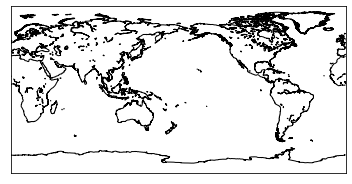

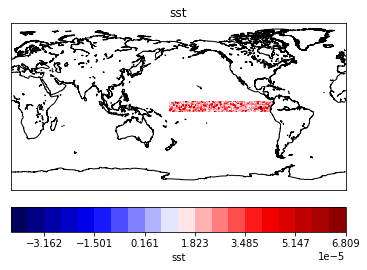

<Figure size 432x288 with 0 Axes>

In [22]:
#Plot the mean data over the years for the selected region on Basemap
plot_map(....)

In [6]:
# Prepare sst anomaly (sst value - mean sst value) for the whole dataset as model input 
X=....

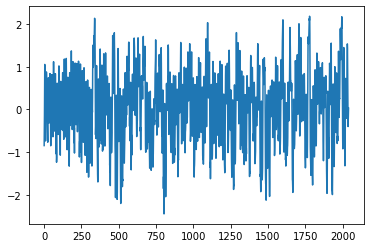

In [26]:
# Calculate sst anomaly for the nino 3.4 region
nino_3_4_sst_anomaly=...

#calculate spatial mean nino 3.4 sst anomaly for each year

mean_nino_3_4_sst_anomaly=...

#Detrend mean nino 3.4 sst anomaly    
    
mean_nino_3_4_sst_anomaly=...

#Plot detrended mean_nino_3_4_sst_anomaly
...

In [28]:
#Prepare labels such that, if mean nino 3.4 sst anomaly value >.5 then 'El-nino' , mean nino 3.4 sst anomaly value <.5 then 'La-nina' and the other values will be discarded. Prepare the corresponding input values also.
def prepare_model_input(mean_nino_3_4_sst_anomaly,X):
    index=[]
    ENSO_label=[]

    .....

    X=X[index]
    y=ENSO_label
    return (X,y)

In [30]:
X,y=prepare_model_input(...)

In [33]:
#Transform masked array into numpy array by replacing nan values by 0.
import math

def transform_masked_array(X):
    ...
    return X
X=transform_masked_array(X)    

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1712779069.py:13: UserWarning: Warning: converting a masked element to nan.
  if math.isnan(val)==False:


In [35]:
# Split into training and testing set with test set fraction as .33

X_train, X_test, y_train, y_test = ...

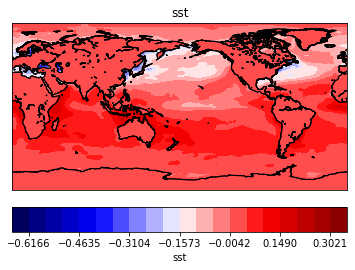

<Figure size 432x288 with 0 Axes>

In [36]:
#Plot mean training and testing set on map
plot_map(...)

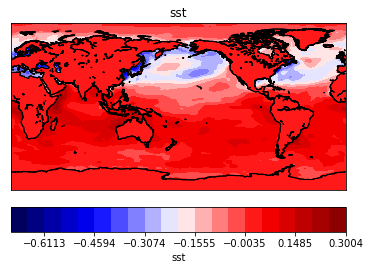

<Figure size 432x288 with 0 Axes>

In [37]:
plot_map(...)

In [39]:
# Define and fit PCA

n_components = 150

...

In [27]:
X_train.shape

(791, 180, 360)

In [40]:
#Transform training and testing set using PCA
X_train_pca = ...
X_test_pca = ...

In [34]:
X_train_pca.shape

(791, 150)

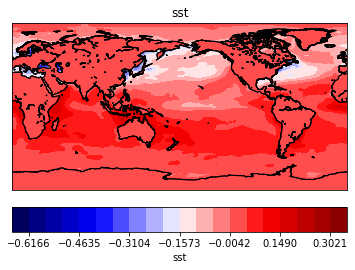

<Figure size 432x288 with 0 Axes>

In [41]:
#Plot mean PCA map
plot_map(...)

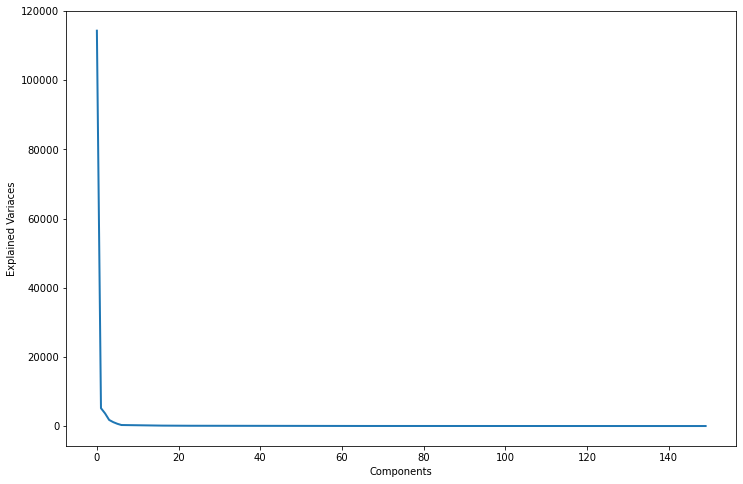

In [43]:
# Plot explained variance and variance ratio on graph

...

In [45]:
from tqdm.notebook import tqdm
import torch
# Create a device variable which will be used to shift model and data to GPU if available
...

In [46]:
# Define pytorch NN classifier which reflects highest testing accuracy(around .99) with minimum number of layers.
class FFN(torch.nn.Module):
   ...

In [47]:
# First create a pytorch dataset from the numpy train data
dataset_train = ...
# Create a dataloader object which will create batches of data
dataloader_train = ...

In [49]:
# Train the classifier 

...



Epoch: 1


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.6911240172386169 	Acc: 0.538558786346397


Epoch: 2


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.666993362903595 	Acc: 0.7534766118836915


Epoch: 3


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.5959573864936829 	Acc: 0.8558786346396966


Epoch: 4


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.46941373944282533 	Acc: 0.9671302149178256


Epoch: 5


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3636371099948883 	Acc: 0.9962073324905183


Epoch: 6


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3290327560901642 	Acc: 0.9987357774968394


Epoch: 7


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3200963401794434 	Acc: 1.0


Epoch: 8


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3173864507675171 	Acc: 1.0


Epoch: 9


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3161297428607941 	Acc: 1.0


Epoch: 10


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3153922665119171 	Acc: 1.0


Epoch: 11


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.31488458514213563 	Acc: 1.0


Epoch: 12


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3142763829231262 	Acc: 1.0


Epoch: 13


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.31404412031173706 	Acc: 1.0


Epoch: 14


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.31387921690940856 	Acc: 1.0


Epoch: 15


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3137676012516022 	Acc: 1.0


Epoch: 16


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3136856186389923 	Acc: 1.0


Epoch: 17


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3136171519756317 	Acc: 1.0


Epoch: 18


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.31356592297554015 	Acc: 1.0


Epoch: 19


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3135242736339569 	Acc: 1.0


Epoch: 20


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.31349144101142884 	Acc: 1.0


Epoch: 21


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3134645450115204 	Acc: 1.0


Epoch: 22


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3134412693977356 	Acc: 1.0


Epoch: 23


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3134238874912262 	Acc: 1.0


Epoch: 24


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.31340810656547546 	Acc: 1.0


Epoch: 25


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.31339537978172305 	Acc: 1.0


Epoch: 26


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3133824229240417 	Acc: 1.0


Epoch: 27


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.3133718192577362 	Acc: 1.0


Epoch: 28


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3133630537986755 	Acc: 1.0


Epoch: 29


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.313355153799057 	Acc: 1.0


Epoch: 30


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.3133481514453888 	Acc: 1.0


Epoch: 31


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3133416748046875 	Acc: 1.0


Epoch: 32


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3133358836174011 	Acc: 1.0


Epoch: 33


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.31333081841468813 	Acc: 1.0


Epoch: 34


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3133265566825867 	Acc: 1.0


Epoch: 35


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.3133224713802338 	Acc: 1.0


Epoch: 36


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.31331889510154726 	Acc: 1.0


Epoch: 37


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.31331552147865294 	Acc: 1.0


Epoch: 38


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.31331258177757265 	Acc: 1.0


Epoch: 39


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.313309451341629 	Acc: 1.0


Epoch: 40


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.31330700635910036 	Acc: 1.0


Epoch: 41


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3133043074607849 	Acc: 1.0


Epoch: 42


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.3133021914958954 	Acc: 1.0


Epoch: 43


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.31330000519752504 	Acc: 1.0


Epoch: 44


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132981288433075 	Acc: 1.0


Epoch: 45


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.31329684257507323 	Acc: 1.0


Epoch: 46


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.31329490542411803 	Acc: 1.0


Epoch: 47


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132931303977966 	Acc: 1.0


Epoch: 48


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.31329175472259524 	Acc: 1.0


Epoch: 49


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.31329047560691836 	Acc: 1.0


Epoch: 50


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.31328919291496277 	Acc: 1.0


Epoch: 51


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.313288027048111 	Acc: 1.0


Epoch: 52


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132869756221771 	Acc: 1.0


Epoch: 53


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.3132858443260193 	Acc: 1.0


Epoch: 54


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132849133014679 	Acc: 1.0


Epoch: 55


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.31328401565551756 	Acc: 1.0


Epoch: 56


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.313283189535141 	Acc: 1.0


Epoch: 57


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132822573184967 	Acc: 1.0


Epoch: 58


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.31328153133392334 	Acc: 1.0


Epoch: 59


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.3132808828353882 	Acc: 1.0


Epoch: 60


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132802188396454 	Acc: 1.0


Epoch: 61


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.31327938675880435 	Acc: 1.0


Epoch: 62


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.31327887535095217 	Acc: 1.0


Epoch: 63


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.3132783830165863 	Acc: 1.0


Epoch: 64


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132775855064392 	Acc: 1.0


Epoch: 65


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.3132771015167236 	Acc: 1.0


Epoch: 66


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132765245437622 	Acc: 1.0


Epoch: 67


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132761836051941 	Acc: 1.0


Epoch: 68


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.31327557921409604 	Acc: 1.0


Epoch: 69


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132751953601837 	Acc: 1.0


Epoch: 70


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.3132747149467468 	Acc: 1.0


Epoch: 71


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132742893695831 	Acc: 1.0


Epoch: 72


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.31327396154403686 	Acc: 1.0


Epoch: 73


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.31327352643013 	Acc: 1.0


Epoch: 74


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132731640338898 	Acc: 1.0


Epoch: 75


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.31327288031578066 	Acc: 1.0


Epoch: 76


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132724952697754 	Acc: 1.0


Epoch: 77


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.31327213644981383 	Acc: 1.0


Epoch: 78


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.31327183842658995 	Acc: 1.0


Epoch: 79


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.31327157735824585 	Acc: 1.0


Epoch: 80


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.3132712721824646 	Acc: 1.0


Epoch: 81


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.31327096700668333 	Acc: 1.0


Epoch: 82


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.31327070236206056 	Acc: 1.0


Epoch: 83


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.31327052354812623 	Acc: 1.0


Epoch: 84


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.31327025532722474 	Acc: 1.0


Epoch: 85


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.3132700002193451 	Acc: 1.0


Epoch: 86


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132697796821594 	Acc: 1.0


Epoch: 87


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.3132695686817169 	Acc: 1.0


Epoch: 88


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.31326934695243835 	Acc: 1.0


Epoch: 89


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.313269202709198 	Acc: 1.0


Epoch: 90


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.3132689487934113 	Acc: 1.0


Epoch: 91


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.31326876759529115 	Acc: 1.0


Epoch: 92


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132686448097229 	Acc: 1.0


Epoch: 93


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132684087753296 	Acc: 1.0


Epoch: 94


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132682967185974 	Acc: 1.0


Epoch: 95


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.313268119096756 	Acc: 1.0


Epoch: 96


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132679331302643 	Acc: 1.0


Epoch: 97


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.31326775670051576 	Acc: 1.0


Epoch: 98


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132676470279694 	Acc: 1.0


Epoch: 99


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.31326751947402953 	Acc: 1.0


Epoch: 100


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132673501968384 	Acc: 1.0


Epoch: 101


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.3132672452926636 	Acc: 1.0


Epoch: 102


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.31326709628105165 	Acc: 1.0


Epoch: 103


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.3132669544219971 	Acc: 1.0


Epoch: 104


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132668340206146 	Acc: 1.0


Epoch: 105


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.3132667136192322 	Acc: 1.0


Epoch: 106


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132666182518005 	Acc: 1.0


Epoch: 107


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.313266487121582 	Acc: 1.0


Epoch: 108


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.3132663893699646 	Acc: 1.0


Epoch: 109


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.3132662618160248 	Acc: 1.0


Epoch: 110


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132661747932434 	Acc: 1.0


Epoch: 111


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132660508155823 	Acc: 1.0


Epoch: 112


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132659578323364 	Acc: 1.0


Epoch: 113


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.3132658529281616 	Acc: 1.0


Epoch: 114


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.3132657980918884 	Acc: 1.0


Epoch: 115


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.3132656764984131 	Acc: 1.0


Epoch: 116


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.31326561093330385 	Acc: 1.0


Epoch: 117


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.3132655167579651 	Acc: 1.0


Epoch: 118


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132654416561127 	Acc: 1.0


Epoch: 119


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.31326536536216737 	Acc: 1.0


Epoch: 120


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.31326526641845703 	Acc: 1.0


Epoch: 121


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132651948928833 	Acc: 1.0


Epoch: 122


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.31326512336730955 	Acc: 1.0


Epoch: 123


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132650566101074 	Acc: 1.0


Epoch: 124


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132649838924408 	Acc: 1.0


Epoch: 125


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.3132649028301239 	Acc: 1.0


Epoch: 126


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.3132648694515228 	Acc: 1.0


Epoch: 127


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132647693157196 	Acc: 1.0


Epoch: 128


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.31326472878456113 	Acc: 1.0


Epoch: 129


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.31326465964317324 	Acc: 1.0


Epoch: 130


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132646131515503 	Acc: 1.0


Epoch: 131


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.31326453924179076 	Acc: 1.0


Epoch: 132


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132644772529602 	Acc: 1.0


Epoch: 133


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.3132644402980804 	Acc: 1.0


Epoch: 134


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132643795013428 	Acc: 1.0


Epoch: 135


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.3132643163204193 	Acc: 1.0


Epoch: 136


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.31326424598693847 	Acc: 1.0


Epoch: 137


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.31326419949531553 	Acc: 1.0


Epoch: 138


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.3132641541957855 	Acc: 1.0


Epoch: 139


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132641053199768 	Acc: 1.0


Epoch: 140


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132640767097473 	Acc: 1.0


Epoch: 141


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.3132640051841736 	Acc: 1.0


Epoch: 142


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.3132639789581299 	Acc: 1.0


Epoch: 143


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.3132639276981354 	Acc: 1.0


Epoch: 144


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.3132638776302338 	Acc: 1.0


Epoch: 145


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132638418674469 	Acc: 1.0


Epoch: 146


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.31326381921768187 	Acc: 1.0


Epoch: 147


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.31326377630233765 	Acc: 1.0


Epoch: 148


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132637250423431 	Acc: 1.0


Epoch: 149


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.31326367139816286 	Acc: 1.0


Epoch: 150


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.31326365351676944 	Acc: 1.0


Epoch: 151


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.31326361298561095 	Acc: 1.0


Epoch: 152


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.31326358318328856 	Acc: 1.0


Epoch: 153


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132635462284088 	Acc: 1.0


Epoch: 154


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.313263486623764 	Acc: 1.0


Epoch: 155


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.31326347947120664 	Acc: 1.0


Epoch: 156


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.31326343774795534 	Acc: 1.0


Epoch: 157


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.31326339721679686 	Acc: 1.0


Epoch: 158


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.31326337695121764 	Acc: 1.0


Epoch: 159


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.31326335310935977 	Acc: 1.0


Epoch: 160


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132633125782013 	Acc: 1.0


Epoch: 161


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132632839679718 	Acc: 1.0


Epoch: 162


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132632660865784 	Acc: 1.0


Epoch: 163


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.31326322436332704 	Acc: 1.0


Epoch: 164


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.31326319336891173 	Acc: 1.0


Epoch: 165


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.3132631754875183 	Acc: 1.0


Epoch: 166


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132631731033325 	Acc: 1.0


Epoch: 167


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.31326310873031615 	Acc: 1.0


Epoch: 168


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132630956172943 	Acc: 1.0


Epoch: 169


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.31326308131217956 	Acc: 1.0


Epoch: 170


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132630550861359 	Acc: 1.0


Epoch: 171


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132630181312561 	Acc: 1.0


Epoch: 172


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.313262996673584 	Acc: 1.0


Epoch: 173


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132629656791687 	Acc: 1.0


Epoch: 174


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.31326295256614684 	Acc: 1.0


Epoch: 175


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.313262939453125 	Acc: 1.0


Epoch: 176


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132629108428955 	Acc: 1.0


Epoch: 177


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132628965377808 	Acc: 1.0


Epoch: 178


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.3132628691196442 	Acc: 1.0


Epoch: 179


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.313262836933136 	Acc: 1.0


Epoch: 180


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.31326282262802124 	Acc: 1.0


Epoch: 181


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132628059387207 	Acc: 1.0


Epoch: 182


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132627856731415 	Acc: 1.0


Epoch: 183


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132627785205841 	Acc: 1.0


Epoch: 184


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.31326273798942567 	Acc: 1.0


Epoch: 185


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132627332210541 	Acc: 1.0


Epoch: 186


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132627236843109 	Acc: 1.0


Epoch: 187


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132627010345459 	Acc: 1.0


Epoch: 188


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132626807689667 	Acc: 1.0


Epoch: 189


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.31326266407966613 	Acc: 1.0


Epoch: 190


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.313262642621994 	Acc: 1.0


Epoch: 191


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.31326263666152954 	Acc: 1.0


Epoch: 192


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132626187801361 	Acc: 1.0


Epoch: 193


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132625961303711 	Acc: 1.0


Epoch: 194


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.3132625937461853 	Acc: 1.0


Epoch: 195


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132625734806061 	Acc: 1.0


Epoch: 196


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.31326255440711975 	Acc: 1.0


Epoch: 197


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.3132625389099121 	Acc: 1.0


Epoch: 198


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

Loss: 0.31326252460479737 	Acc: 1.0


Epoch: 199


C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.3132625102996826 	Acc: 1.0


Epoch: 200


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


Loss: 0.31326250672340394 	Acc: 1.0


In [50]:
# Report prediction accuracy and confusion matrix
...

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       197
           1       0.99      0.99      0.99       193

    accuracy                           0.99       390
   macro avg       0.99      0.99      0.99       390
weighted avg       0.99      0.99      0.99       390



C:\Users\Deepayan\AppData\Local\Temp\ipykernel_2488\1169010628.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


In [52]:
#randomly select 5 maps from testing set, plot them on map, predict classes using their PCA data and report them along with their true label.
...

C:\Users\Deepayan\AppData\Local\Temp\ipykernel_5708\4052381038.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.Softmax()(self.layer3(x))


tensor(0)